In [1]:
!pip install qiskit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 3.9 MB/s eta 0:00:00


In [2]:
!pip install qiskit_aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 25.2 MB/s eta 0:00:00


In [1]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator

We have to put the same states of alice and bob and eve uses random Basis.
Alice's State:	 [1 0 1 1 0 1 0 1]
Alice's Bases:	 [0 1 0 0 0 0 0 1]
Bob's Bases:	 [0 1 1 0 0 0 1 1].

We copied the states from other notebook as there we set seed so that states does not chagnes with re run

In [2]:
np.random.seed(123)
n_qubits = 8
alice_state = np.array([1, 0, 1, 1, 0, 1, 0, 1])
alice_basis = np.array([0, 1, 0, 0, 0, 0, 0, 1])
bob_basis = np.array([0, 1, 1, 0, 0, 0, 1, 1])
eve_basis = np.random.randint(2, size=n_qubits)

print("Alice's State:", alice_state)
print("Alice's Bases:", alice_basis)
print("Bob's Bases:", bob_basis)
print(f"Eve's Bases:\t {np.array2string(eve_basis)}")

Alice's State: [1 0 1 1 0 1 0 1]
Alice's Bases: [0 1 0 0 0 0 0 1]
Bob's Bases: [0 1 1 0 0 0 1 1]
Eve's Bases:	 [0 1 0 0 0 0 0 1]


###state: array of 0s and 1s denoting the state to be encoded
    basis: array of 0s and 1s denoting the basis to be used for encoding
                #0 -> Computational Basis
                #1 -> Hadamard Basis
    meas_basis: array of 0s and 1s denoting the basis to be used for measurement
                #0 -> Computational Basis
                #1 -> Hadamard Basis

In [3]:
def quantum_circuit(state, alice_basis, bob_basis, eve_basis):

    n_qubits = len(state)

    qc = QuantumCircuit(n_qubits)

    # Sender (Alice) prepares qubits
    for i in range(len(alice_basis)):
        if state[i] == 1:
            qc.x(i)
        if alice_basis[i] == 1:
            qc.h(i)
    qc.barrier()

    # Eavesdropper (Eve) intercepts qubits
    for i in range(len(eve_basis)):
        if eve_basis[i] == 1:
            qc.h(i)
    qc.barrier()
    # Measuring action performed by Bob
    for i in range(len(bob_basis)):
        if bob_basis[i] == 1:
            qc.h(i)

    qc.measure_all()

    return qc

In [4]:
circuit = quantum_circuit(alice_state, alice_basis, bob_basis,eve_basis)
backend=AerSimulator()
job=backend.run(circuit)
result=job.result()
key=result.get_counts().most_frequent()
encryption_key = ''
for i in range(n_qubits):
    if alice_basis[i] == bob_basis[i]:
         encryption_key += str(key[i])
print(f"Key: {encryption_key}")

Key: 010101


In [5]:
print(circuit)

        ┌───┐      ░       ░       ░ ┌─┐                     
   q_0: ┤ X ├──────░───────░───────░─┤M├─────────────────────
        ├───┤      ░ ┌───┐ ░ ┌───┐ ░ └╥┘┌─┐                  
   q_1: ┤ H ├──────░─┤ H ├─░─┤ H ├─░──╫─┤M├──────────────────
        ├───┤      ░ └───┘ ░ ├───┤ ░  ║ └╥┘┌─┐               
   q_2: ┤ X ├──────░───────░─┤ H ├─░──╫──╫─┤M├───────────────
        ├───┤      ░       ░ └───┘ ░  ║  ║ └╥┘┌─┐            
   q_3: ┤ X ├──────░───────░───────░──╫──╫──╫─┤M├────────────
        └───┘      ░       ░       ░  ║  ║  ║ └╥┘┌─┐         
   q_4: ───────────░───────░───────░──╫──╫──╫──╫─┤M├─────────
        ┌───┐      ░       ░       ░  ║  ║  ║  ║ └╥┘┌─┐      
   q_5: ┤ X ├──────░───────░───────░──╫──╫──╫──╫──╫─┤M├──────
        └───┘      ░       ░ ┌───┐ ░  ║  ║  ║  ║  ║ └╥┘┌─┐   
   q_6: ───────────░───────░─┤ H ├─░──╫──╫──╫──╫──╫──╫─┤M├───
        ┌───┐┌───┐ ░ ┌───┐ ░ ├───┤ ░  ║  ║  ║  ║  ║  ║ └╥┘┌─┐
   q_7: ┤ X ├┤ H ├─░─┤ H ├─░─┤ H ├─░──╫──╫──╫──╫──╫──╫──╫─┤M├
        

Circuit Functionality:

  ## Alice's Role:
        Alice initiates the protocol by preparing qubits in a superposition state.
        She applies the X gate to qubits representing a logical 1 and the H gate to those representing a logical 0, creating a superposition of both states.

  ## Eve's Interception:
        Eve, a potential eavesdropper, intercepts the qubits before reaching Bob.
        She performs measurements on the intercepted qubits, potentially compromising the security of the communication.

  ## Bob's Role:
        Bob receives the qubits from Alice, unaware of any interception by Eve.
        He measures the qubits in a basis different from Eve's to detect any potential interference.
        Bob applies the H gate to qubits representing a logical 0 and maintains qubits representing a logical 1 unchanged.

# Breakdown of Circuit Parts:

    Alice's Part:
        Alice's segment involves the preparation of qubits in a superposition state using the X and H gates.
    Eve's Part:
        Eve's intervention occurs during qubit transmission, where she potentially alters the state of intercepted qubits.
    Bob's Part:
        Bob's segment entails the measurement of qubits received from Alice, ensuring their integrity by applying the H gate to a different set of qubits.

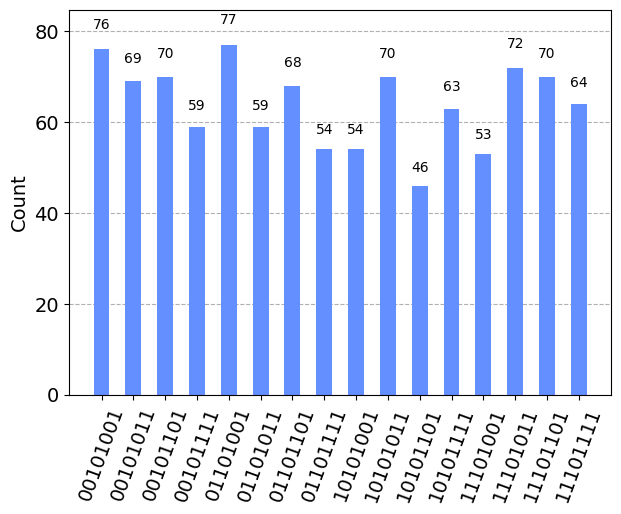

In [6]:
from qiskit.visualization import plot_histogram

plot_histogram(result.get_counts())



The histogram shows the distribution of the measured outcomes. Since Eve is involved, she can gain some information about the key by measuring the qubits in a different basis than Bob. This can be seen in the histogram, as there are more counts for the outcomes that correspond to Eve's basis than for the outcomes that correspond to Bob's basis.

For example, in the given circuit, Eve measures the first qubit in the Hadamard basis and the second qubit in the computational basis. This means that she has a 50% chance of measuring the first qubit correctly and a 100% chance of measuring the second qubit correctly.

Eve's eavesdropping can be detected by Alice and Bob by comparing their key bits. If they find that their keys are different, they know that Eve has been eavesdropping.

**The encryption key for this circuit is 010101**

This one is different from the previous one when even is not involved. So Eve's Presence may be detected.